# AirBnB in New York City: Exploratory Data Analysis (EDA) & Machine Learning (ML) predicting how a house's features predict price

In the following exercise, I will, after a first stage of complete data cleaning of a dataset featuring AirBnB accommodations in Ney York City:

- thoroughly and visually describe the dataset, including the data's observable patterns, via Exploratory Data Analysis
- build a Machine Learning model accurately predicting a New York City's accommodation one-day-price by knowing a few of its other featured characteristics

## Data Cleaning:

In [3]:
import pandas as pd

file_path = '/Users/goncalolazaro/Downloads/AB_NYC_2019.csv'

df = pd.read_csv(file_path)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
# Checking for missing values in the dataset:

nan_values = df.isna()

any_missing_values = nan_values.any()

print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

# Count the number of null values in each column
null_counts = df.isnull().sum()

print("Number of null values in each column:")
print(null_counts)


Missing Values in the Entire DataFrame?
id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool
Number of null values in each column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                     

## How to treat the identified missing data:

I've decided to apply no changes to the rows with missing 'name' or 'host name', as neither of those characteristics will be analysed in this project.

By keeping those rows, I have the advantage of working with a larger hence richer dataset than I would've if I deleted the rows, whilst not having any of the shortcomings normally associated with missing data (as, effectively, I won't use it).

As for the rows with missing data on last_review, I'll assume no reviews were carried out for the associated facilities and change each null value to 'No reviews'. 

As for the rows with missing data on reviews_per_month, I'll use the same assumption as I did last hence change each null value to 0.

In [7]:
# Changing the NaN values of column last_review to 'No reviews':

df['last_review'].fillna('No Reviews', inplace=True)

df['reviews_per_month'].fillna(0, inplace=True)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No Reviews,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
# Check if there are any duplicate rows and remove them

df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
# Checking how many unique values are there in the room_type column to then inform how we'll turn that categorical column into a numerical one

unique_room_types = df['room_type'].unique()

print(unique_room_types)

['Private room' 'Entire home/apt' 'Shared room']


In [10]:
# Turning the room_type into a numerical column by ranking its unique values as follows:

# Shared room = 1 & Private room = 2 & Entire home/apt = 3

df['room_type'] = df['room_type'].map({'Shared room': 1, 'Private room': 2, 'Entire home/apt': 3})
df['room_type'] = df['room_type'].astype(float)

print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

   room_type  price  minimum_nights  number_of_reviews last_review  \
0        2.0    149               1                  9  2018-10-19   


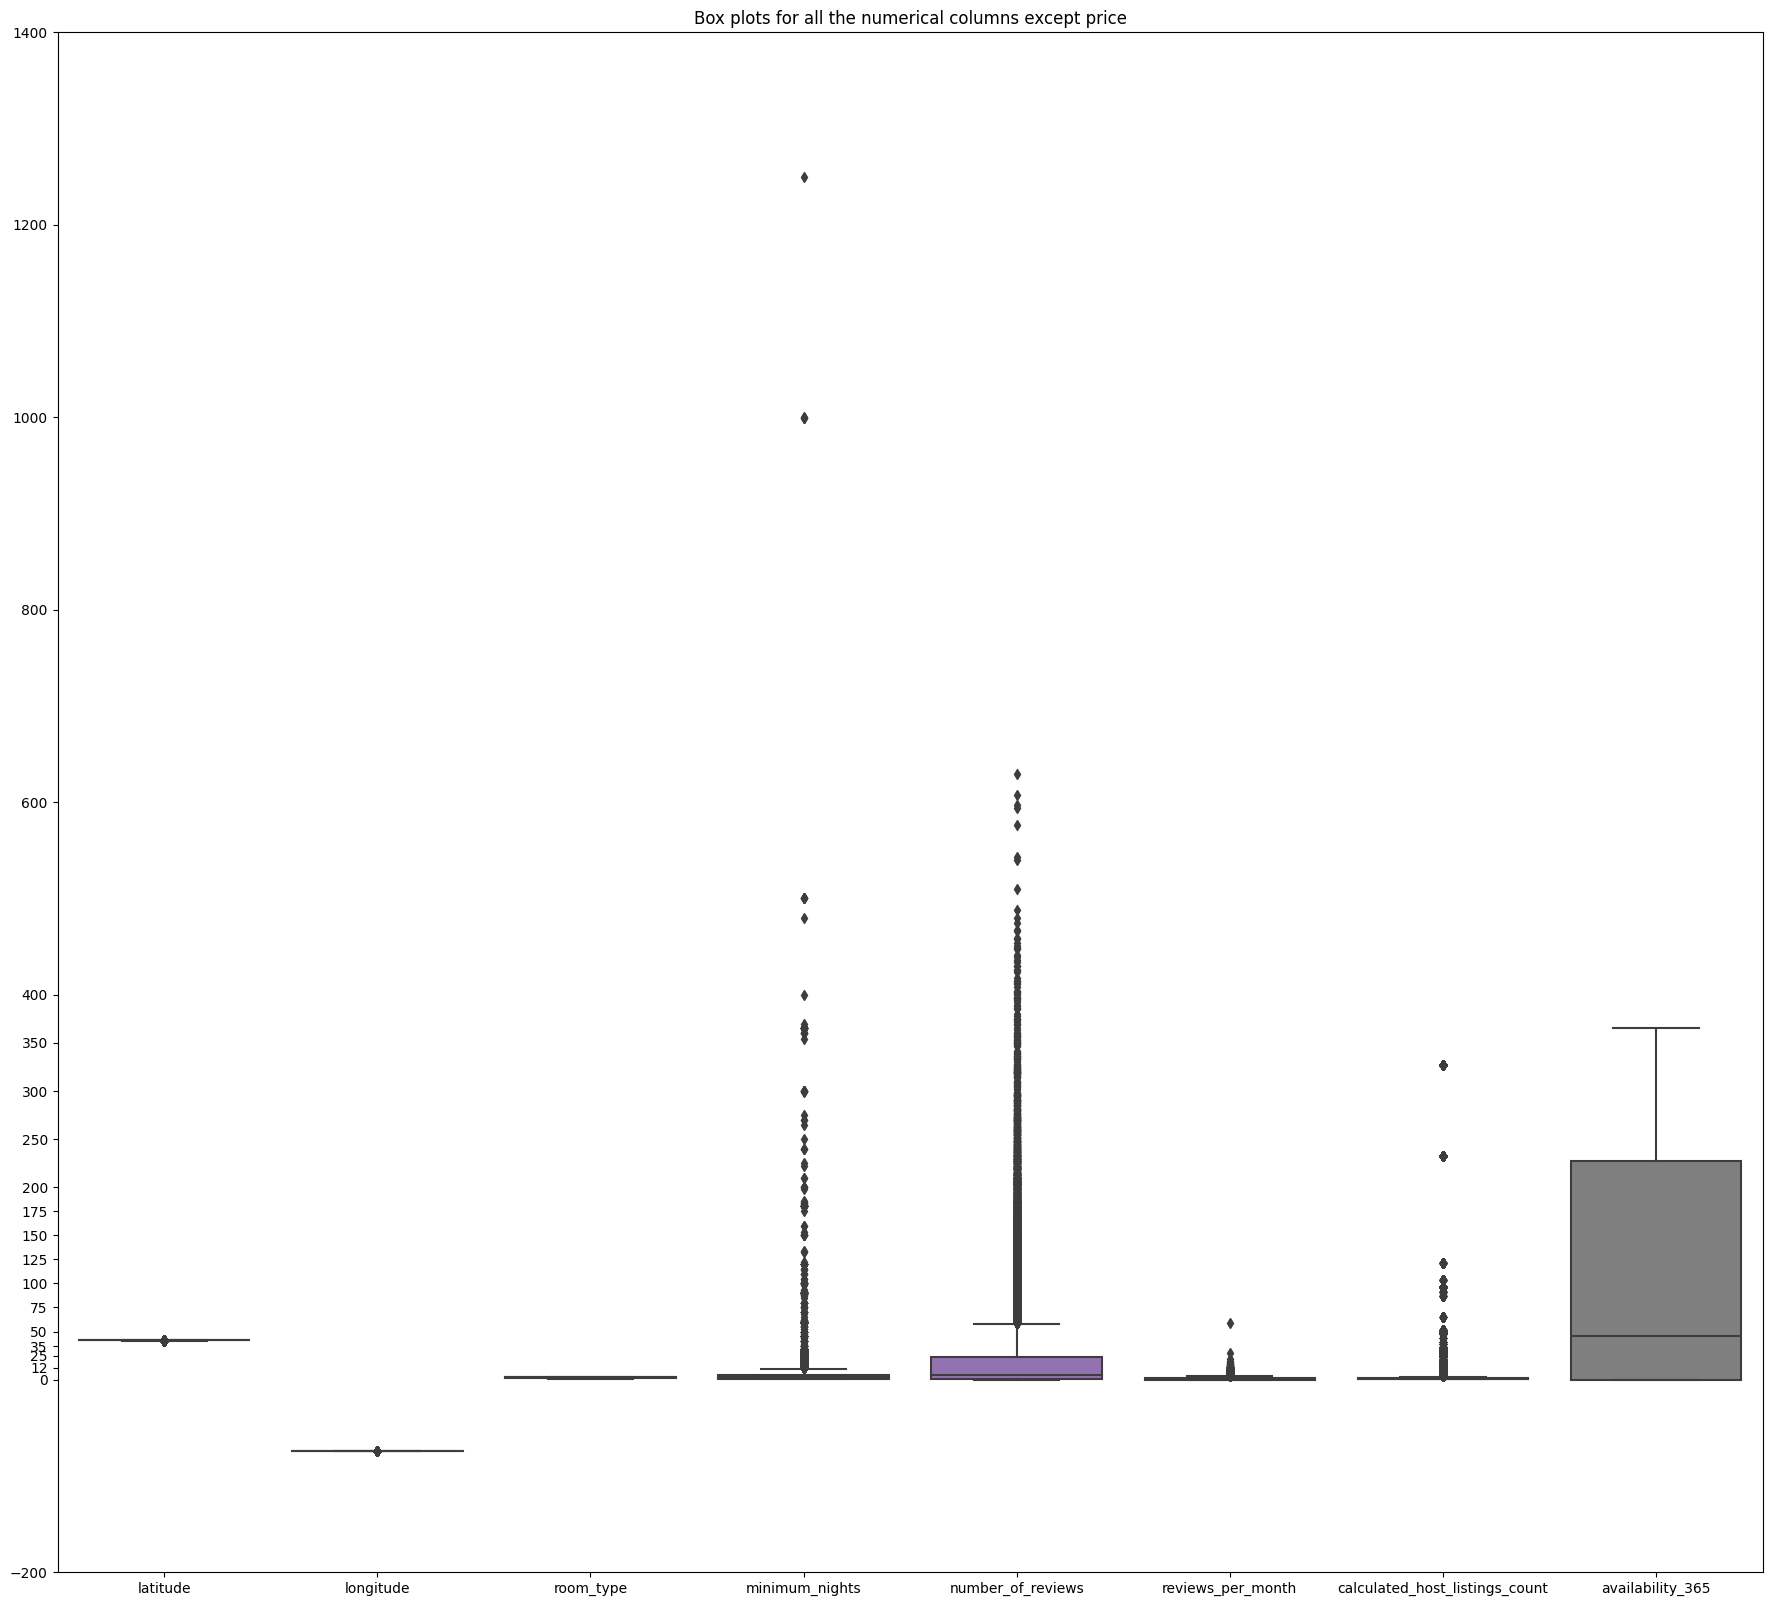

In [11]:
# Checking if there are outliers in all numerical columns except for price (whose boxplot I'll plot on a separate block of code, as the scale of its values far exceeds any other column in the dataset):

import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

plt.figure(figsize=(22,20))

sns.boxplot(data=df[numerical_columns])

plt.title('Box plots for all the numerical columns except price')

# Set additional numbers for the y-axis
additional_ticks = [12.5, 25, 35, 50, 75, 100, 125, 150, 175, 250, 300, 350]  # Example additional numbers
plt.yticks(list(plt.yticks()[0]) + additional_ticks)

plt.show()

Text(0.5, 1.0, 'Box plots for price')

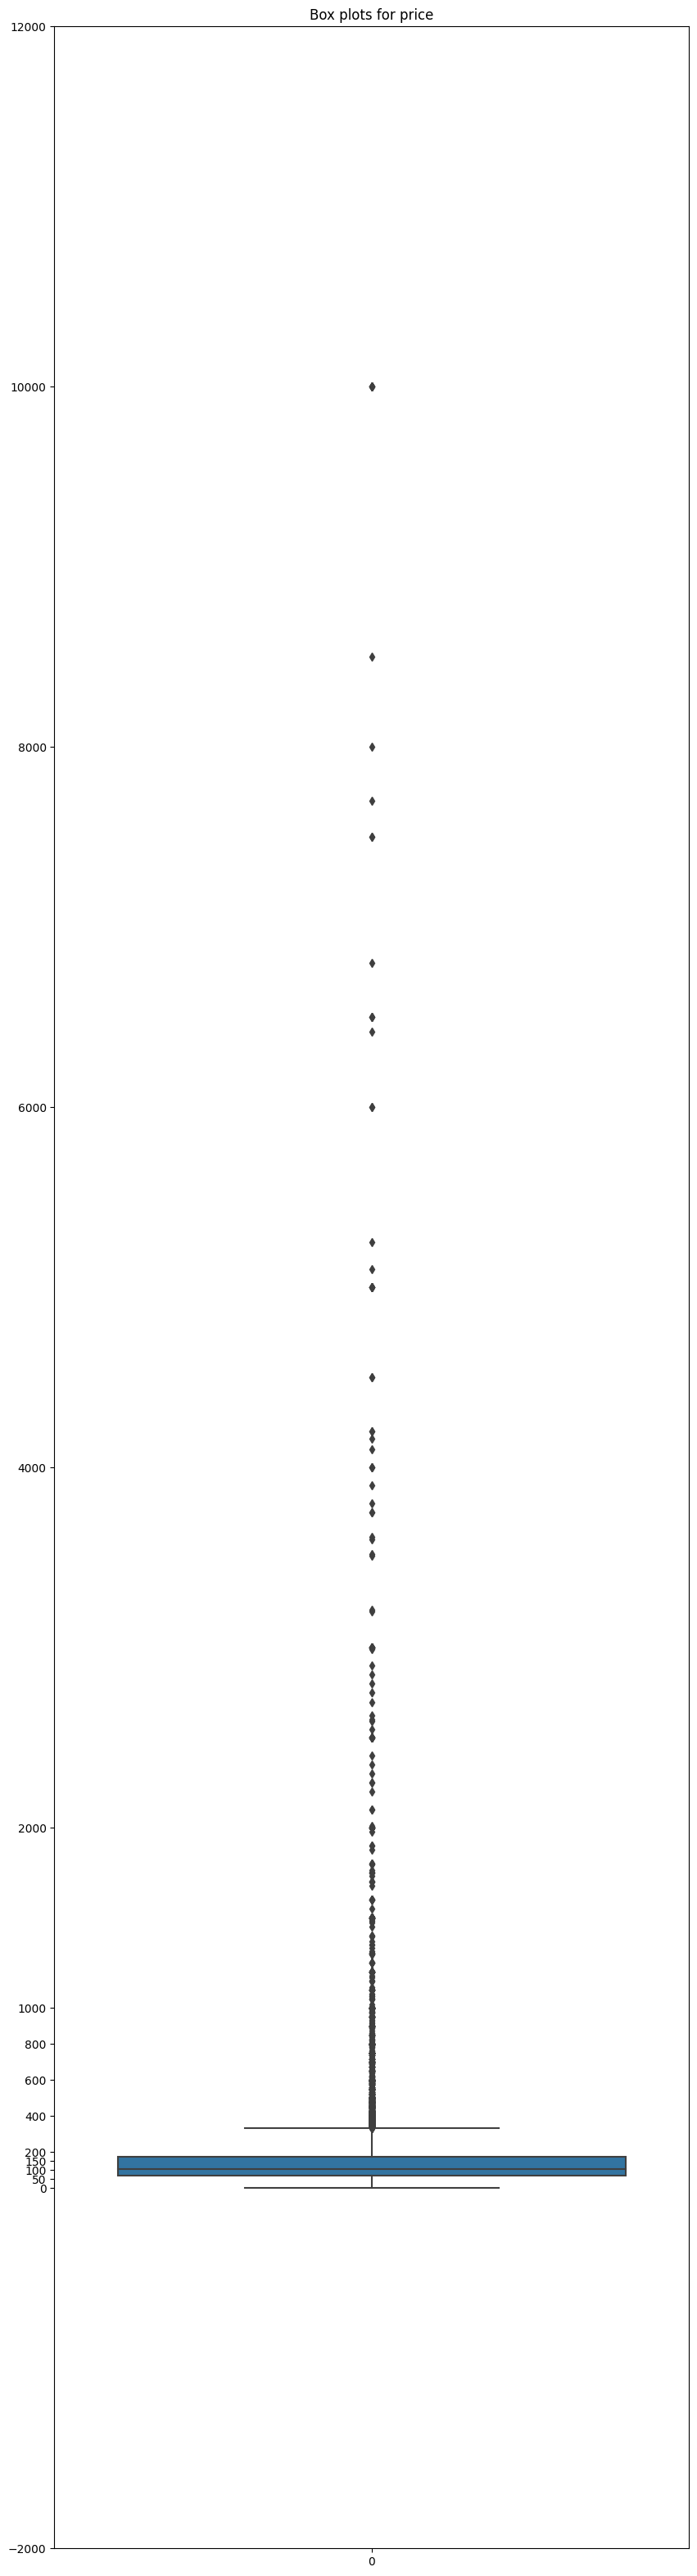

In [10]:
# Checking if there are outliers in the price column

plt.figure(figsize=(10,40))

sns.boxplot(data=df['price'])

# Set additional numbers for the y-axis
additional_ticks = [50, 100, 150, 200, 400, 600, 800, 1000]  # Example additional numbers
plt.yticks(list(plt.yticks()[0]) + additional_ticks)

plt.title('Box plots for price')

## How to treat each numerical column's outliers:

I have decided to keep all existing outliers in the dataset, as they are, with no modification or elimination.

That is because I believe those provide important information on how dispersed the data is, and showings of data-dispersion should be part and parcel of any exhaustive Exploratory Data Analysis (EDA).

Further on in this project, after Exploratory Data Analysis and depending on the results of my Machine Learning model, I will exclude outliers to improve its performance if the model doesn't perform well enough without outlier-exclusion.

## Exploratory Data Analysis:

## Histograms:

I'm starting with a group of Histograms which show, for each now-numerical column (meaning, I'm including the once-categorical turned-numerical room_type column in my plot) the frequency of accommodations per featured categories

/var/folders/tl/0f7z6w712nvdfy5v1rdvdylh0000gn/T/ipykernel_672/1198996468.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i)


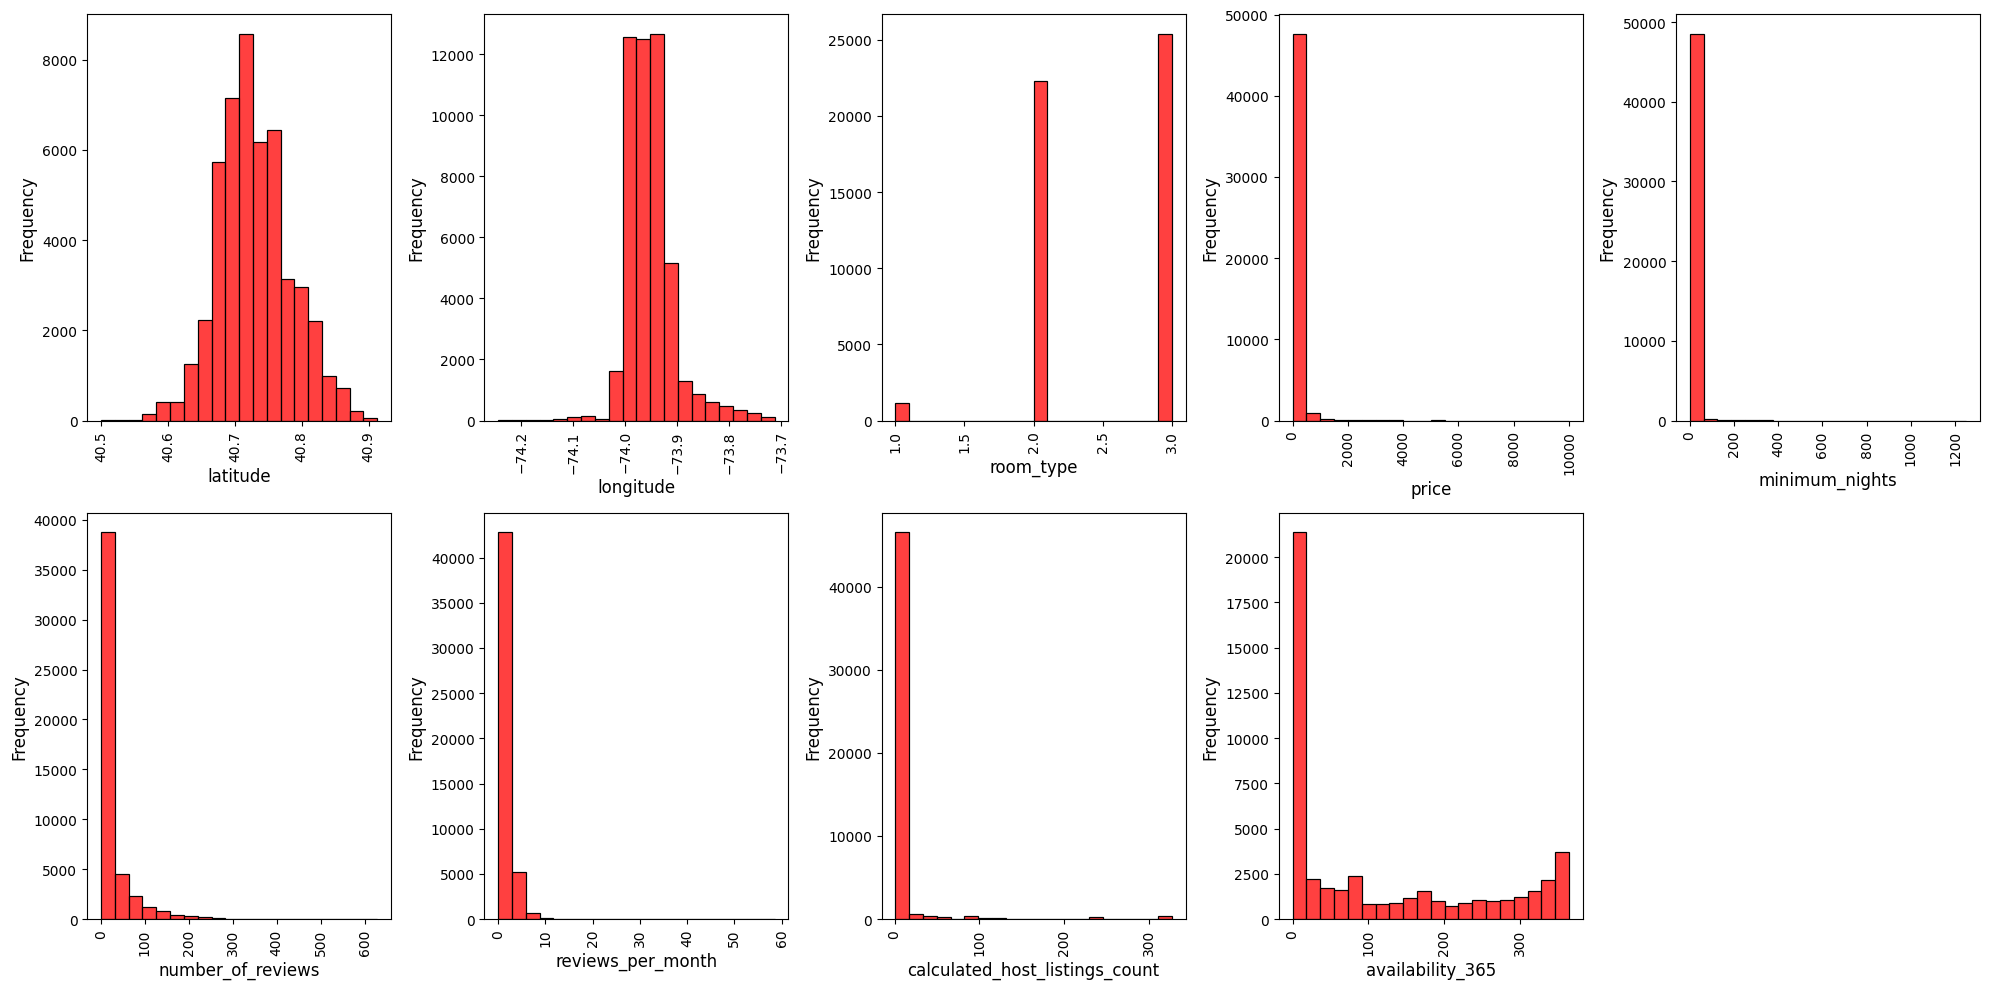

In [11]:
## Plotting the histograms:

columns_to_plot = ['latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

fig = plt.subplots(figsize=(20, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 5, i)
    sns.histplot(data=df, x=column, bins=20, color='red')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Insights from the histograms:

Includes additional notes from the boxplots, for when histograms don't narrow down enough the specific range inside which the majority of accommodations exist
(i.e.: we won't say the great majority of one-day accommodation prices stand between 0 and 1000 - as the histogram suggests - when in that range could be narrowed to 0 to 200 euros)

- Latitude --> the majority of accommodations are situated in the latitudes from 40.65 to 40.8, with the overall distribution of data points being right-skewed (mean > median)

- Longitude --> the majority of accommodations are situated in the longitudes from -74.0 to -73.9, with the overall distribution of data points being right-skewed (mean > median)

- Room type --> the majority of accommodations are either 'Private room'(2) or 'Entire home/apt'(3) with a slightly higher number of accommodations being the latter, meaning the overall distribution of data points in right-skewed (mean > median)

- Price --> the majority of accommodations exist in the 0 to 200 euros bracket (as confirmed by the price's boxplot, above the histograms) with the overall distribution of data points being left-skewed (mean < median)

- Minimum nights --> the majority of accommodations exist in the 0 to 12 day minimum-day accommodation bracket with the overall distribution of data points being left-skewed (mean < median)

- Number of reviews --> the majority of accommodations exist in the 0 to 35 reviews bracket with the overall distribution of data points being left-skewed (mean < median)

- Reviews per month --> the majority of accommodations exist in the 0 to 12 reviews-per-month bracket with the overall distribution of data points being left-skewed (mean < median)

- Calculated host listings count --> the majority of accommodations have a host which has at most 12 accommodations to his/her name with the overall distribution of data points being left-skewed (mean < median)

- Availability_365 --> the majority of accommodations are available at most 250 days out of the year with the overall distribution of data points being left-skewed (mean < median)

## Pair Plots:

I'm continuing my analysis by now plotting the Pair Plots, which show, for each pair of numerical columns in our dataset, the relationship between those pairs.

The resulting charts help us understand when our numerical columns have a linear and non-linear relationships between themselves, also giving us visual indication of correlation strength.

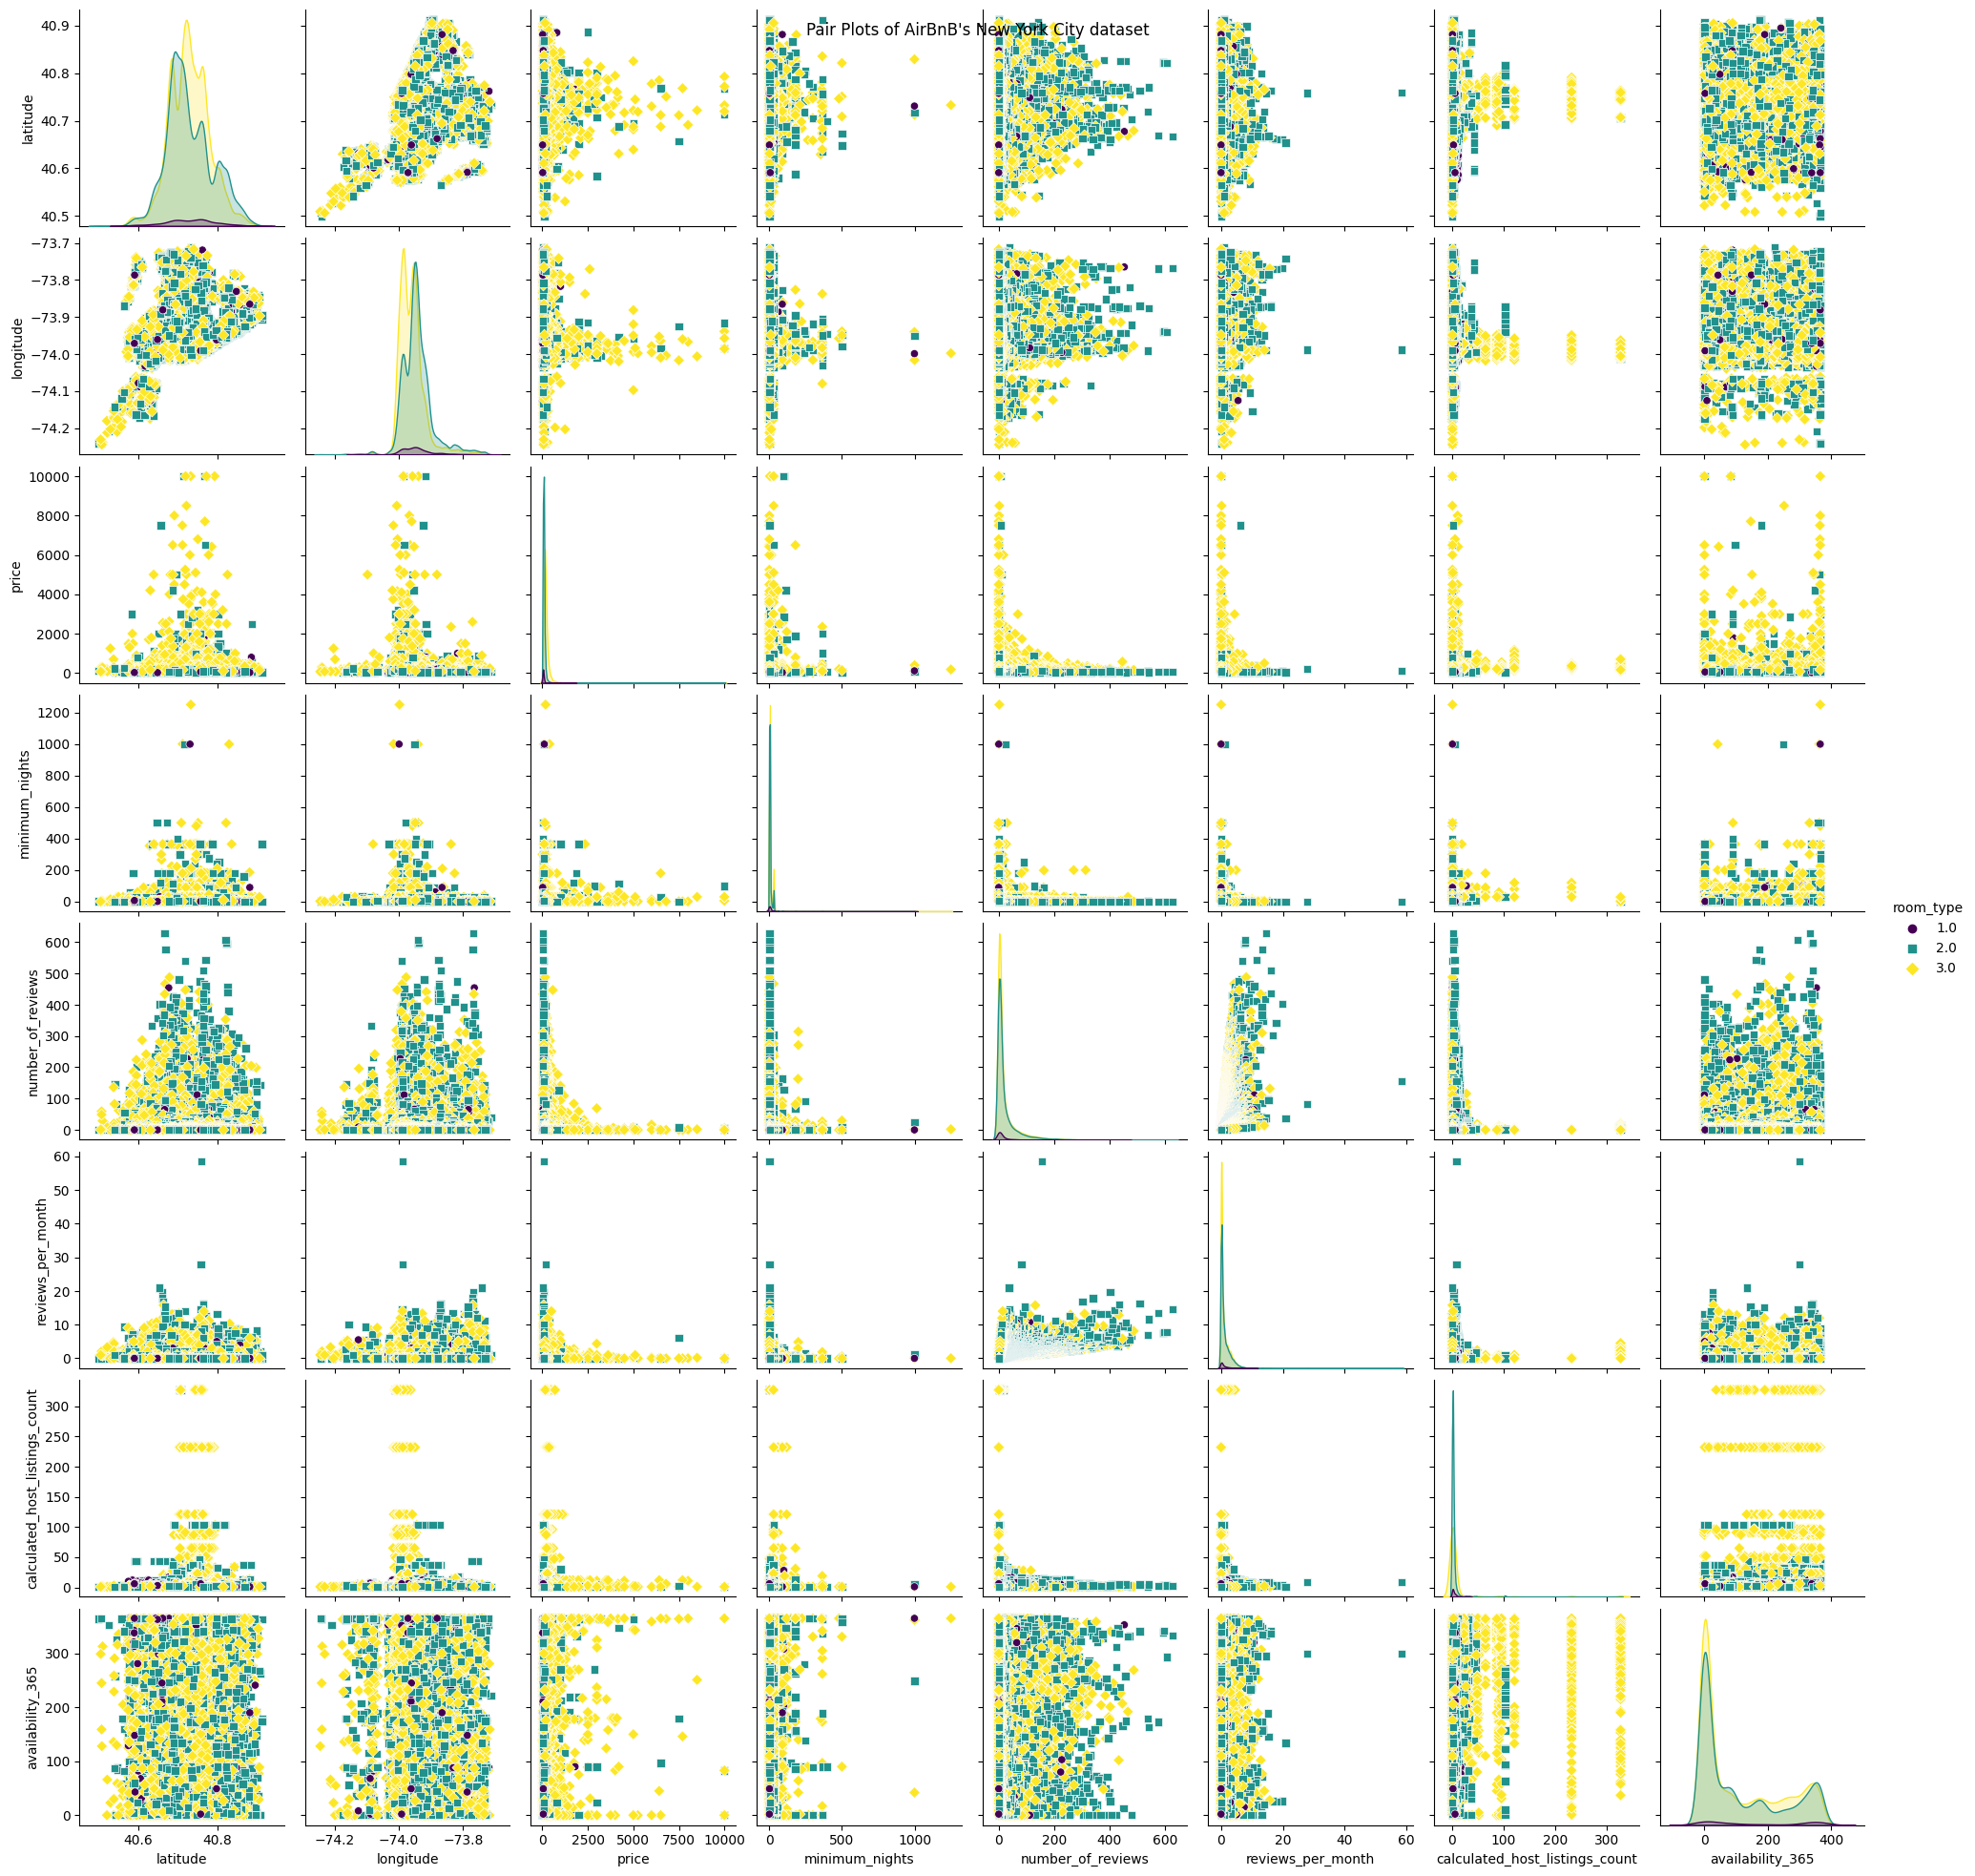

In [19]:
# Creating the Pair Plots:

df_subset = df.drop(columns=['id', 'host_id'])

sns.pairplot(df_subset, hue = 'room_type', palette = 'viridis', markers = ['o', 's', 'D'])

plt.suptitle("Pair Plots of AirBnB's New York City dataset")

plt.show()

## Insights from the pair plots:

- Availability 365 X Latitude --> for any and all of the 3 room_types, I do not identify any meaningful connection between the 2 variables
- Availability 365 X Longitude --> for any and all of the 3 room_types, I do not identify any meaningful connection between the 2 variables
- Availability 365 X Price --> for any and all of the 3 room_types, I do identify a polynomial function of degree 4 (Quartic function) describing the price per night as being its highest for accommodations that either have a very low or very high yearly availability, with a significant but progressive drop as yearly availability leaves the extremes and comes closer to its median value (with the exception of a slight raise in price in the values closest to that very median)
- Availability 365 X Minimum Nights --> for 'Share_room' & 'Entire home/apt' the minimum number of nights seems to increase as the yearly availability does too (with the curve's slope being more pronounced in the former case) & for 'Private_room' the minimum number of nights seems to be highest in the polar extremes of yearly availability and dropping in its middle values
- Availability 365 X Number of Reviews --> for any and all of the 3 room_types, I do not identify any meaningful connection between the 2 variables
- Availability 365 X Reviews per month --> for any and all of the 3 room_types, I do not identify any meaningful connection between the 2 variables
- Availability 365 X Calculated host listings count --> for any and all of the 3 room_types, I do not identify any meaningful connection between the 2 variables

- Calculated host listings count X Latitude --> for any and all of the 3 room_types, the hosts having the highest number of listings seem to have them around the 40.8 latitude area, with the former metric progressively dropping as latitude approaches its maximum and minimum values in the dataset
- Calculated host listings count X Longitude --> for any and all of the 3 room_types, the hosts having the highest number of listings seem to have them around the -73.95 longitude area, with the former metric progressively dropping as longitude approaches its maximum and minimum values in the dataset
- Calculated host listings count X Price --> for any and all of the 3 room_types, the highest prices per listing are associated with the hosts having the lowest observable number of listings, and as the latter metric increases, the prices per listing become smaller
- Calculated host listings count X Minimum nights --> for any and all of the 3 room_types, the highest number of minimum nights is associated with the hosts having the lowest observable number of listings, and as the latter metric increases, the number of minimum nights becomes smaller
- Calculated host listings count X Number of reviews --> for any and all of the 3 room_types, the highest number of reviews is associated with the hosts having the lowest observable number of listings, and as the latter metric increases, the number of reviews becomes smaller
- Calculated host listings count X Reviews per month --> for any and all of the 3 room_types, the highest number of reviews per month is associated with the hosts having the lowest observable number of listings, and as the latter metric increases, the number of reviews per month becomes smaller

- Reviews per month X Latitude --> for any and all of the 3 room_types, the number of reviews per month seems to be the highest around the 40.7 latitude area, with the former metric progressively dropping as latitude approaches its maximum and minimum values in the dataset
- Reviews per month X Longitude --> for any and all of the 3 room_types, the number of reviews per month seems to be the highest around the -73.7 longitude area, with the former metric progressively dropping as longitude drops itself
- Reviews per month X Price --> for any and all of the 3 room_types, the highest prices per listing are associated with the lowest number of reviews per month, and as the latter metric increases, the prices per listing become smaller
- Reviews per month X Minimum nights --> for any and all of the 3 room_types, the highest number of minimum nights is associated with the lowest number of reviews per month, and as the latter metric increases, the number of minimum nights becomes smaller
- Reviews per month X Number of reviews --> for any and all of the 3 room_types, there seems to exist a linear relationship between these 2 variables, with one improving as the other does too; this linear curve has a large slope, with small increments of reviews per month signifying large increases in total number of reviews, which makes intuitive sense

- Number of reviews X Latitude --> for any and all of the 3 room_types, the number of reviews seems to be the highest around the 40.7 latitude area, with the former metric progressively dropping as latitude approaches its maximum and minimum values in the dataset
- Number of reviews X Longitude --> for any and all of the 3 room_types, the number of reviews seems to be the highest around the -73.9 longitude area, with the former metric progressively dropping as longitude approaches its maximum and minimum values in the dataset
- Number of reviews X Price --> for any and all of the 3 room_types, the highest prices per listing are associated with the lowest number of reviews, and as the latter metric increases, the prices per listing become smaller
- Number of reviews X Minimum nights --> for any and all of the 3 room_types, the highest number of minimum nights is associated with the lowest number of reviews, and as the latter metric increases, the number of minimum nights becomes smaller

- Minimum nights X Latitude --> for any and all of the 3 room_types, the number of minimum nights for an accommodation seems to be the highest around the 40.7 latitude area, with the former metric progressively dropping as latitude approaches its maximum and minimum values in the dataset
- Minimum nights X Longitude --> for any and all of the 3 room_types, the number of minimum nights for an accommodation seems to be the highest around the -74 longitude area, with the former metric progressively dropping as longitude approaches its maximum and minimum values in the dataset
- Minimum nights X Price --> for any and all of the 3 room_types, the highest prices per listing are associated with the lowest number of minimum nights per listing, and as the latter metric increases, the prices per listing become smaller

- Price X Latitude --> for any and all of the 3 room_types, the price for an accommodation seems to be the highest around the 40.7 latitude area, with the former metric progressively dropping as latitude approaches its maximum and minimum values in the dataset
- Price X Longitude --> for any and all of the 3 room_types, the price for an accommodation seems to be the highest around the -74 longitude area, with the former metric progressively dropping as longitude approaches its maximum and minimum values in the dataset

- Longitude X Latitude --> there is a linear relationship between these 2 variables

## Summary of the insights from the pair plots:

- The latitude 40.7 and those closest to it are where the price per listing's the highest, the minimum nights one has to book to get into the accommodation is the highest, the number of reviews (total and per month) is the highest and the average number of listings of the accommodation's host is the highest. All of these metrics drop as latitude drifts away from 40.7.

- The longitude -74.0 and those closest to it are where the price per listing's the highest, the minimum nights one has to book to get into the accommodation is the highest, the number of total reviews is the highest and the average number of listings of the accommodation's host is the highest. All of these metrics drop as longitude drifts away from -74.0.

- The highest-priced accommodations associate with the lowest-available number of minimum nights required to book the accommodation, lowest number of reviews (total and per month), lowest average number of accommodations listed per host and lowest yearly availability. Additionally, the highest-priced accommodations also associate with the highest-available yearly availability. As average listing price dwindles, all the other metrics mentioned except for yearly availability increase (yearly availability is lower in non-maximum and non-minimum average listing prices).

- The highest minimum number of nights a customer must book to have access to accommodation associates with the lowest number of reviews (total and per month), the lowest number of per-host listings and the lowest number of yearly availability in days. As the minimum number of nights dwindles, all the other referred metrics increase. And for yearly availabilty in days, there also is an increase in minimum days required to book the accommodation as availability rises.

- The total number of reviews relates linearly to the number of reviews per month, with one improving as the other does too; this linear curve has a large slope, with small increments of reviews per month signifying large increases in total number of reviews, which makes intuitive sense. Moreover, the highest total number of reviews is associated with the lowest number of listings per host, with the former swiftly becoming very low as the latter increases. Finally, total number of reviws has no observable association with yearly availability.

- The highest number of reviews per month is associated with the hosts having the lowest observable number of listings, and as the latter metric increases, the number of reviews per month becomes smaller. Moreover, there is no relationship between number of reviews per month and yearly availability.

- The number of listings per host has no observable relationship with the yearly availability of accommodations. 

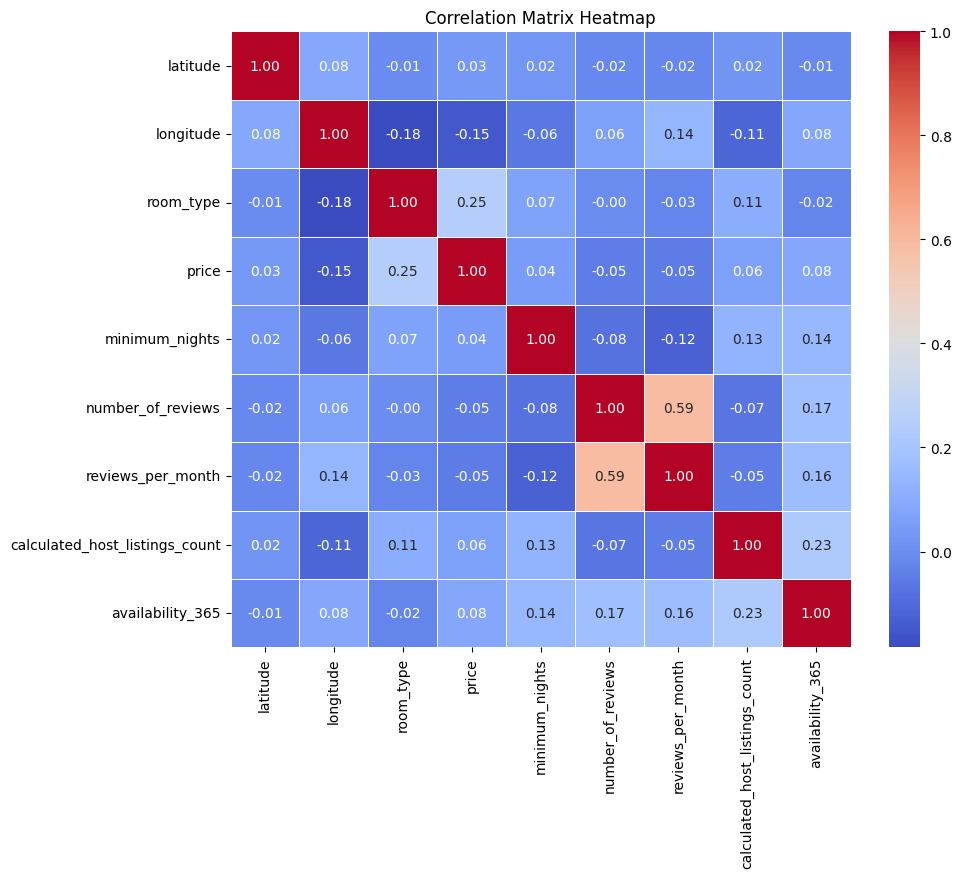

In [20]:
## Correlation matrix heatmap:

numerical_df = df[['latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title("Correlation Matrix Heatmap")

plt.show()

## Insights from the correlation matrix heatmap:

For most variables, there is little correlation between them, which means there is little association between changes in any one variable in that group and changes in any other variable still in that same group.

For a mere few, there is noticeable correlation (both positive & negative), namely:


- Number of reviews X Reviews per month: 0.59 correlation factor
- Price X Room type: 0.25 correlation factor
- Calculated host listings count X Yearly Availability: 0.23 correlation factor


- Room type X Longitude: -0.18 correlation factor
- Price X Longitude: -0.15 correlation factor
- Minimum nights X Reviews per month: -0.12 correlation factor

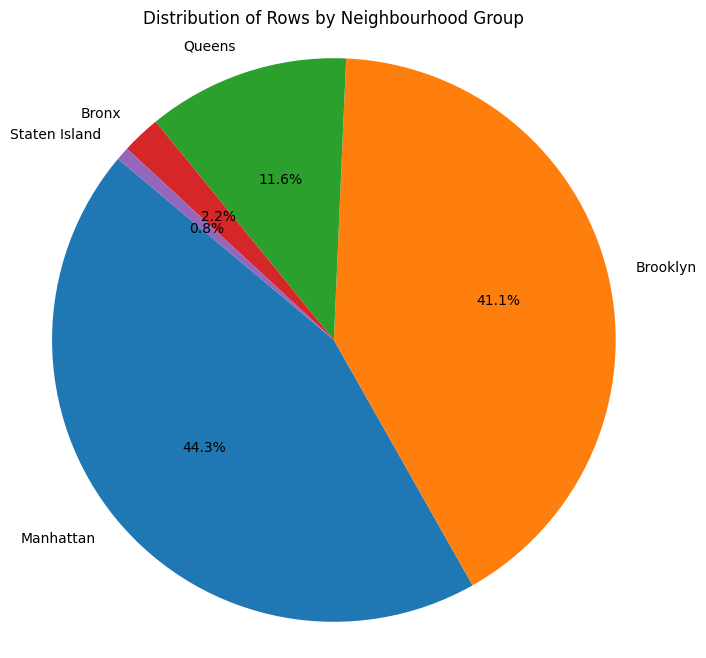

In [19]:
## Pie chart detailing the number of accommodations in each neighbourhood:

group_counts = df['neighbourhood_group'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Rows by Neighbourhood Group')

# Equal aspect ratio ensures that pie is drawn as a circle

plt.axis('equal')  

plt.show()

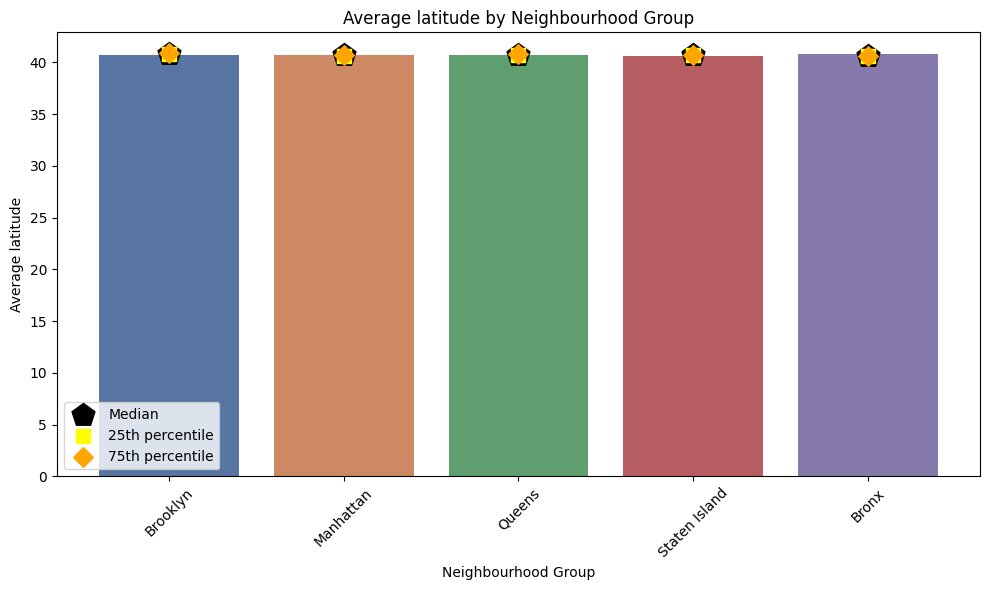

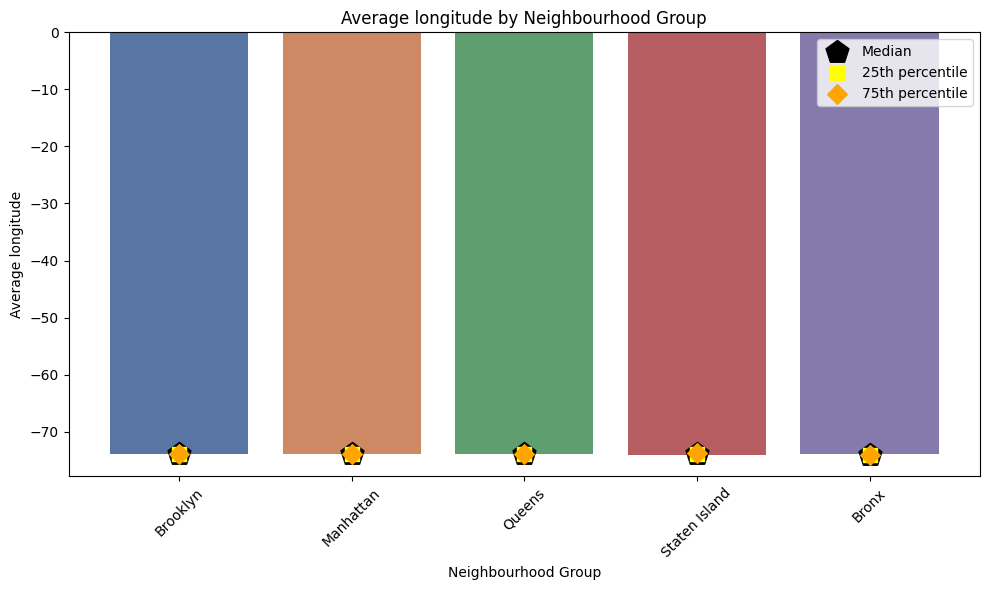

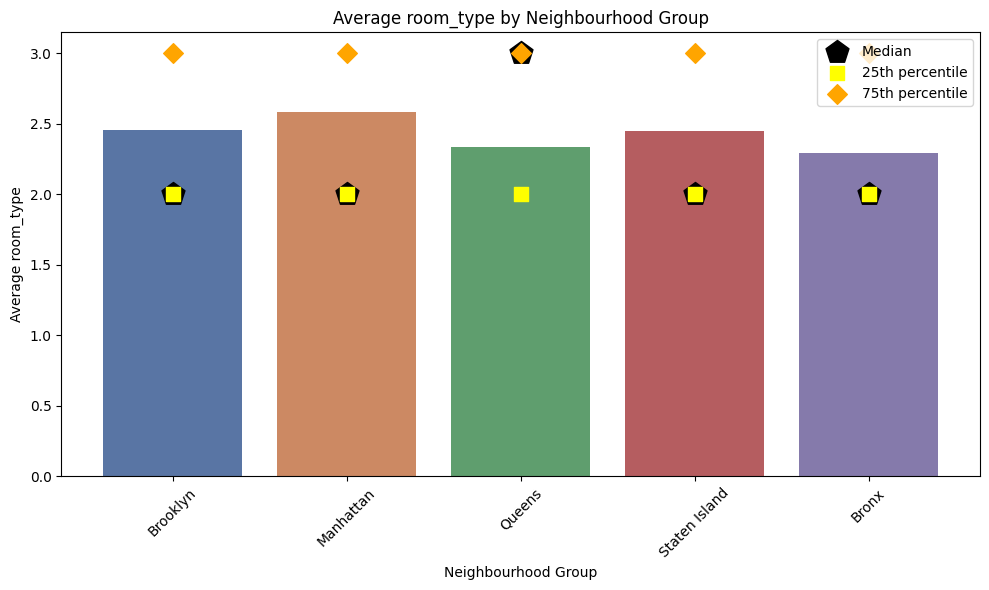

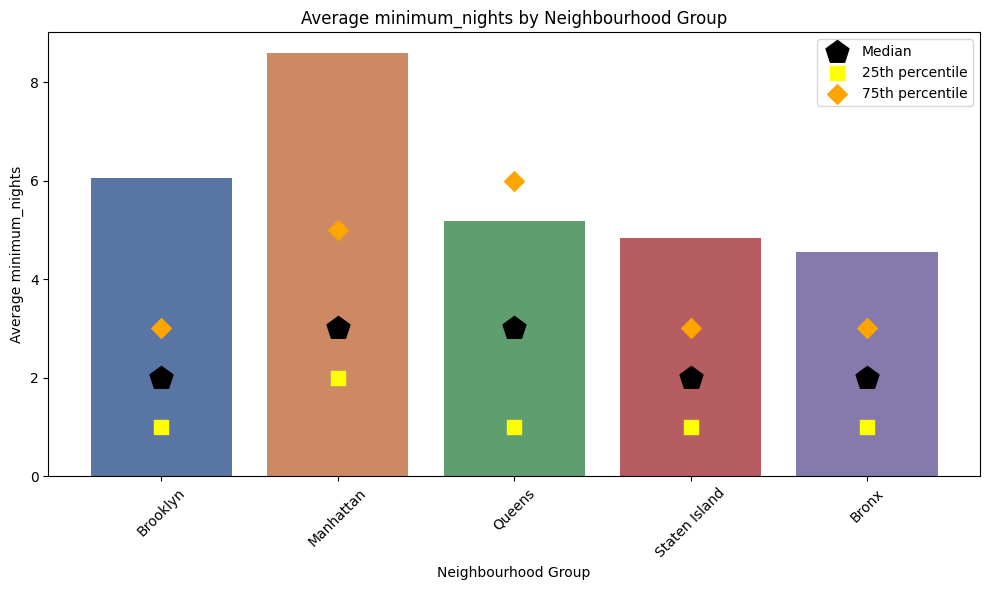

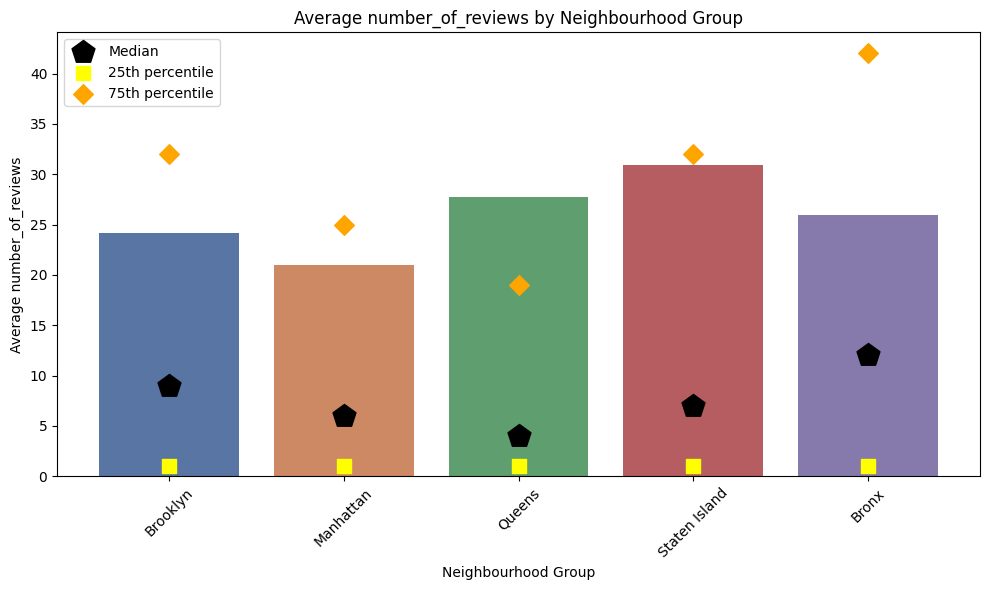

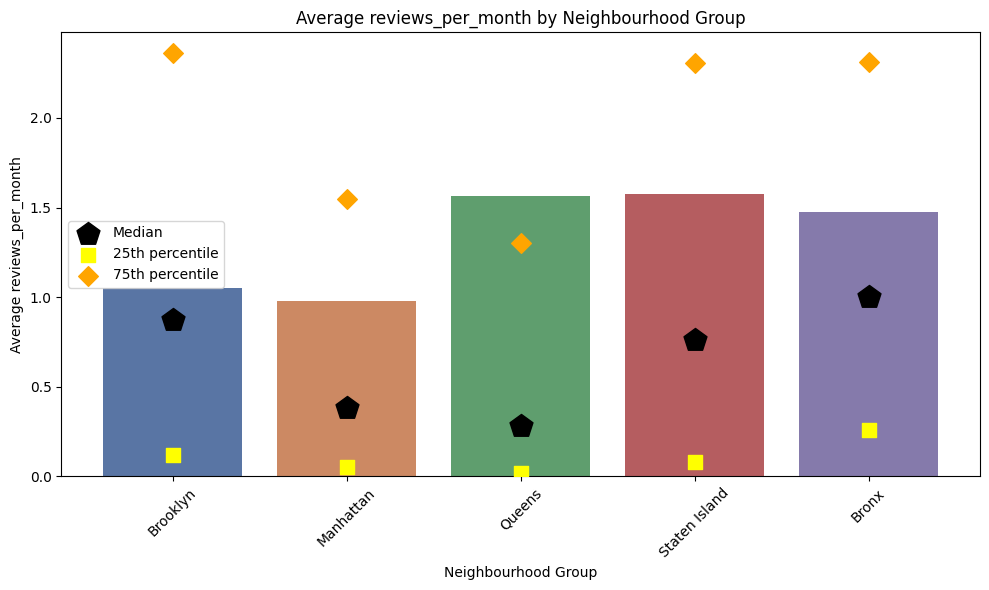

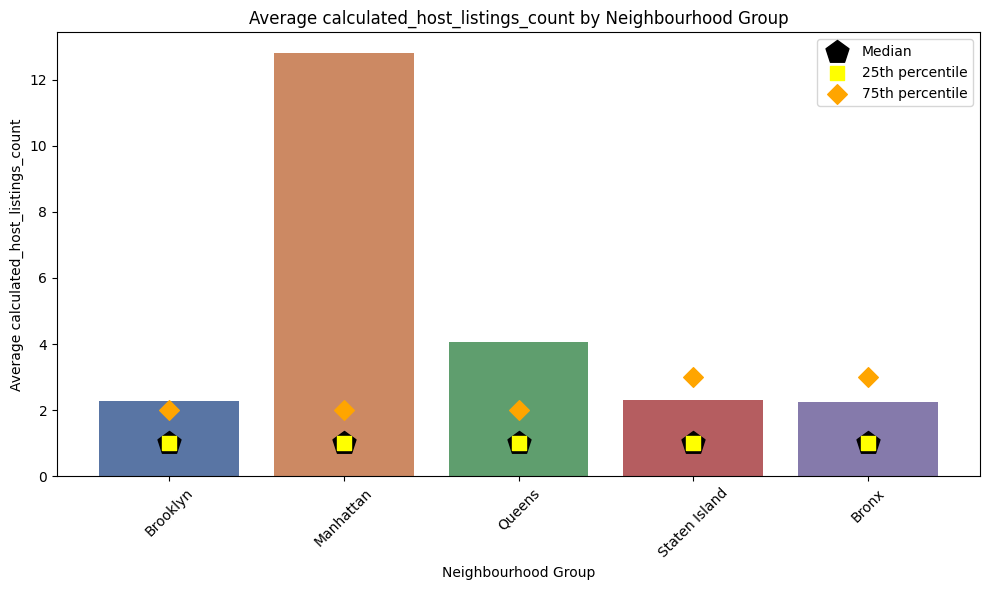

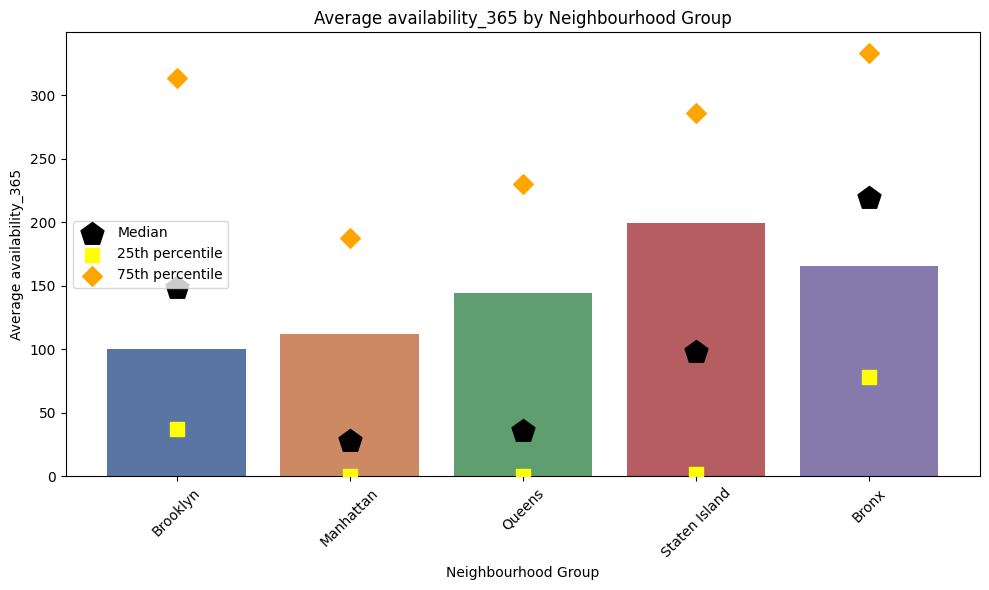

In [64]:
## Bar charts referent to the neighbourhood groups:

for column in numerical_columns:

    median_values = df.groupby('neighbourhood_group')[column].median()
    percentile_25 = df.groupby('neighbourhood_group')[column].quantile(0.25)
    percentile_75 = df.groupby('neighbourhood_group')[column].quantile(0.75)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='neighbourhood_group', y=column, data=df, estimator='mean', palette='deep', errorbar=None)
    plt.scatter(median_values.index, median_values.values, color='black', marker='p', zorder=5, s=300, label='Median')
    plt.scatter(percentile_25.index, percentile_25.values, color='yellow', marker='s', zorder=5, s=100, label='25th percentile')  
    plt.scatter(percentile_75.index, percentile_75.values, color='orange', marker='D', zorder=5, s=100, label='75th percentile')   
    
    plt.title(f'Average {column} by Neighbourhood Group')
    plt.xticks(rotation=45)
    plt.xlabel('Neighbourhood Group')
    plt.ylabel('Average ' + column)
    plt.legend()
    plt.tight_layout()
    plt.show()



## Insights from the pie chart together with the subsequent bar charts:

Manhattan and Brooklyn are the two neighbourhood groups that comprise the most accommodations in the dataset (44% of total places inside Manhattan, 41% of total in Brooklyn) together making up more than 85% of all accommodations and for that reason I will focus solely on those two when communicating insights concerning neighbourhood groups.

- Latitude: as expected when grouping together accommodations from one neighbourhood (and a neighbourhood covers a very small geographical location in relation to the scale of latitudes we're studying), the group's average, median, 25th percentile and 75th percentile are all very close to each other. There is no other relevant business insight to be drawn from this.

- Longitude: as expected when grouping together accommodations from one neighbourhood (and a neighbourhood covers a very small geographical location in relation to the scale of longitudes we're studying), the group's average, median, 25th percentile and 75th percentile are all very close to each other. There is no other relevant business insight to be drawn from this.

- Room type: before I start communicating the insights, I’ll recall what numerical values I’ve attributed to each room type featured on the dataset, 1 is shared room, 2 is private room and 3 is entire room or apartment. For both Manhattan and Brooklyn the average (mean) room type is larger than the median, which means the data distribution for both groups is positively skewed (meaning the bigger values in each distribution are skewing each group’s mean upwards). The lower-valued half of all accommodations, for each of the 2 groups, is well under the groups’ means and that half has a dispersion lower than the higher-valued half does, as hinted by how close each median and 25th percentile are in comparison with the distance between median and 75th percentile and confirmed by the fact the mean is higher than the median. Manhattan’s mean, median, 25th and 75th percentiles are all slightly higher than Brooklyn’s.

- Minimum nights: for both Manhattan and Brooklyn the average (mean) is larger than the median, which means the data distribution for both groups is positively skewed (meaning the bigger values in each distribution are skewing each group’s mean upwards). The lower-valued half of all accommodations, for each of the two groups, is well under the groups’ means, and that half has a low dispersion, as suggested by how close each median and 25th percentile are. The higher-valued half of all accommodations, for Manhattan, has a much larger dispersion than the other half, as hinted by the larger difference distance between median and 75th percentile in comparison with the smaller distance between median and 25th percentile and confirmed by the fact that the mean is higher than the median. As for Brooklyn, the higher-valued half of all accommodations has, too, a larger dispersion than the other half despite the quasi-identical distance between 25th percentile and median and then median and 75th percentile, as confirmed again by the fact that the group’s mean is higher than its median. Manhattan’s mean, median, 25th and 75th percentiles are all higher than Brooklyn’s.

- Number of reviews: for both Manhattan and Brooklyn the average (mean) is larger than the median, which means the data distribution for both groups is positively skewed (meaning the bigger values in each distribution are skewing each group’s mean upwards). The lower-valued half of all accommodations, for each of the two groups, is well under the groups’ means, and that half has a dispersion lower than the higher-valued half does, as hinted by how close each median and 25th percentile are in comparison with the distance between median and 75th percentile and confirmed by the fact the mean is higher than the median. Manhattan’s mean, median and 75th percentiles are all lower than Brooklyn’s. The 25th percentile is very similar between both groups. 

- Reviews per month: for both Manhattan and Brooklyn the average (mean) is larger than the median, which means the data distribution for both groups is positively skewed (meaning the bigger values in each distribution are skewing each group’s mean upwards). The lower-valued half of all accommodations, for each of the two groups, is under the groups’ means (for Manhattan more so than for Brooklyn) and that half has a dispersion lower than the higher-valued half does, as hinted by how close each median and 25th percentile are in comparison with the distance between median and 75th percentile and confirmed by the fact the mean is higher than the median. Brooklyn’s mean, median, 25th and 75th percentiles are all higher than Manhattan’s.

- Calculated hosts listings count: for both Manhattan and Brooklyn, the average (mean) is larger than the median, which means the data distribution for both groups is positively skewed (meaning the bigger values in each distribution are skewing each group’s mean upwards). The lower-valued half of all accommodations, for each of the two groups, is under the groups’ means and that half has a dispersion lower than the higher-valued half does, as hinted by how close each median and 25th percentile are in comparison with the distance between median and 75th percentile and confirmed by the fact the mean is higher than the median. Manhattan’s median, 25th and 75th percentiles are all very similar to Brooklyn’s, while the former neighbourhood’s mean is much larger than the latter’s, thanks to the value or values above Manhattan’s 75th percentile being larger than the value or values above Brooklyn’s 75th percentile.

- Availability 365: for Brooklyn, the average (mean) is shorter than the median, which means the data distribution is negatively skewed (meaning the smaller values are skewing the mean downwards). For Manhattan, it’s the opposite, the average (mean) is larger than the median, meaning the data distribution is positively skewed (meaning the larger values are skewing the mean upwards). For Brooklyn, the lower-valued half of all accommodations ranges above the distribution’s mean and has a higher dispersion than the higher-valued half’s (despite the distance between median and 75th percentile being larger than that of 25th percentile and median) as confirmed by the fact the mean’s lower than the median. For Manhattan, the lower-valued half of all accommodations is under the group’s mean and it has a dispersion lower than than of the higher-valued half, as hinted by how close the median is to the 25th percentile in comparison with the distance between median and 75th percentile and confirmed by the fact the mean is higher than the median. Manhattan’s median, 25th and 75th percentiles are all lower than Brooklyn’s whilst its mean is higher than Brooklyn’s. 

## Preparation of the dataset for Supervised Learning Machine Learning:

## Distribution fitting:

Given that fitting data to a commonly used probability distribution that's similar to the former may ease the effort of predictive modeling, I will test that very action by fitting AirBnB's dataset to well-known distributions. Seen below.

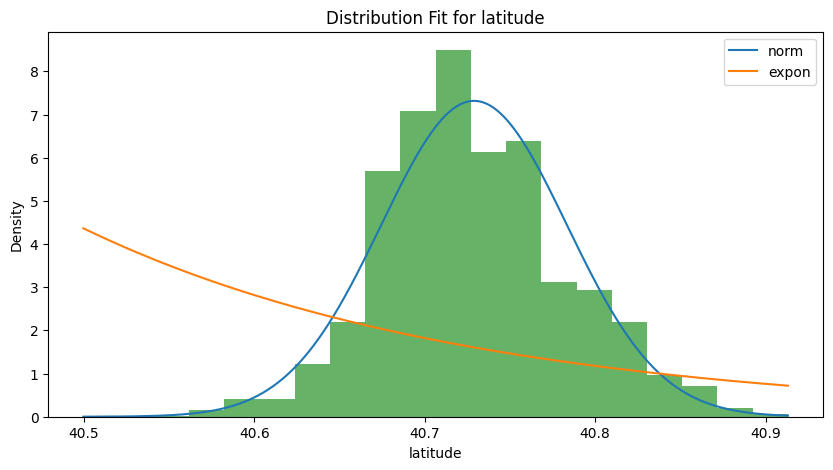

KS Statistic (norm): 0.04707836629736739, P-value: 1.2966371620905806e-94
KS Statistic (expon): 0.42709911021807595, P-value: 0.0
AD Statistic (norm): 168.01563979123603, Critical Values: [0.576 0.656 0.787 0.918 1.092], Significance Level: [15.  10.   5.   2.5  1. ]
AD Statistic (expon): 22368.991188432658, Critical Values: [0.922 1.078 1.341 1.606 1.957], Significance Level: [15.  10.   5.   2.5  1. ]


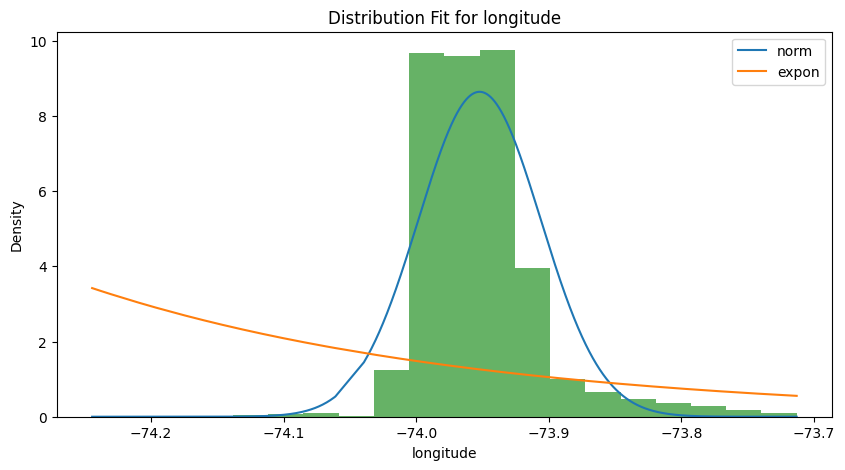

KS Statistic (norm): 0.11721570129746672, P-value: 0.0
KS Statistic (expon): 0.5303501171853104, P-value: 0.0
AD Statistic (norm): 1295.3344463087415, Critical Values: [0.576 0.656 0.787 0.918 1.092], Significance Level: [15.  10.   5.   2.5  1. ]
AD Statistic (expon): 22451.291622049408, Critical Values: [0.922 1.078 1.341 1.606 1.957], Significance Level: [15.  10.   5.   2.5  1. ]


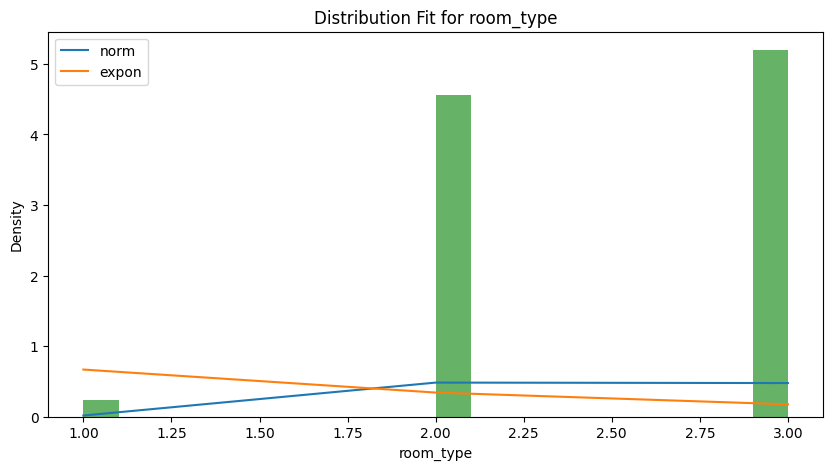

KS Statistic (norm): 0.34198572298254576, P-value: 0.0
KS Statistic (expon): 0.4637866167448251, P-value: 0.0
AD Statistic (norm): 7335.071753157201, Critical Values: [0.576 0.656 0.787 0.918 1.092], Significance Level: [15.  10.   5.   2.5  1. ]
AD Statistic (expon): 14837.619799572203, Critical Values: [0.922 1.078 1.341 1.606 1.957], Significance Level: [15.  10.   5.   2.5  1. ]


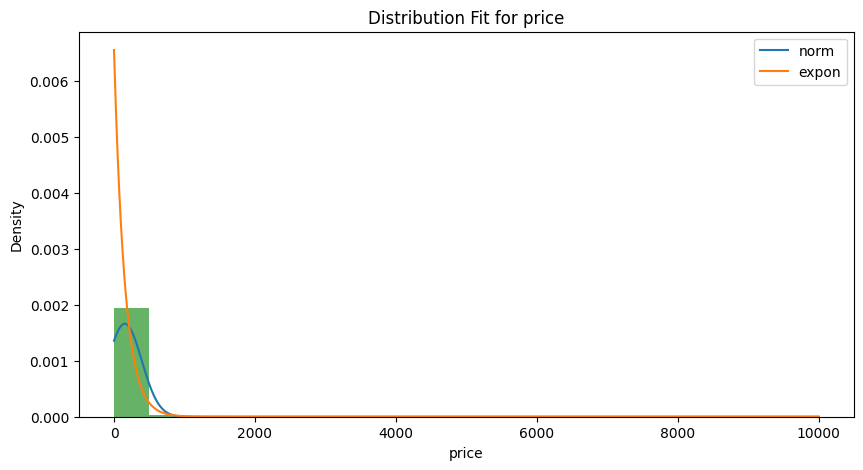

KS Statistic (norm): 0.296408315950434, P-value: 0.0
KS Statistic (expon): 0.1886614160095854, P-value: 0.0
AD Statistic (norm): 7277.445656861237, Critical Values: [0.576 0.656 0.787 0.918 1.092], Significance Level: [15.  10.   5.   2.5  1. ]
AD Statistic (expon): inf, Critical Values: [0.922 1.078 1.341 1.606 1.957], Significance Level: [15.  10.   5.   2.5  1. ]


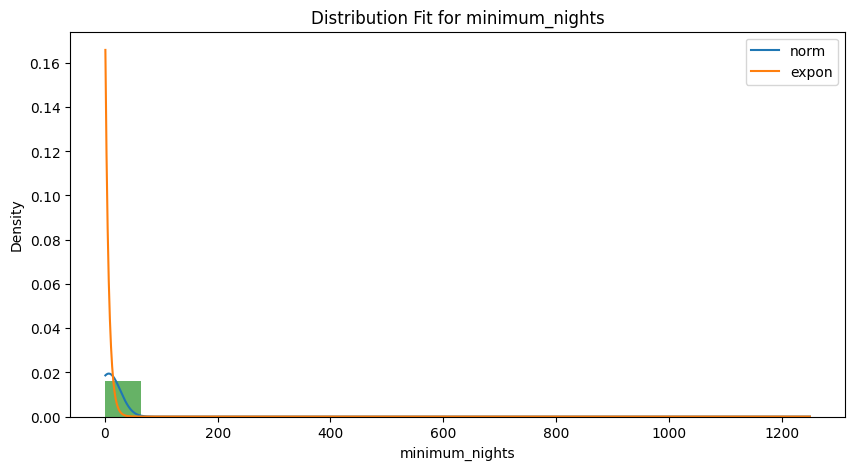

KS Statistic (norm): 0.38438039973659904, P-value: 0.0
KS Statistic (expon): 0.38067030220389186, P-value: 0.0
AD Statistic (norm): 10324.33278503525, Critical Values: [0.576 0.656 0.787 0.918 1.092], Significance Level: [15.  10.   5.   2.5  1. ]
AD Statistic (expon): 6682.392169248895, Critical Values: [0.922 1.078 1.341 1.606 1.957], Significance Level: [15.  10.   5.   2.5  1. ]


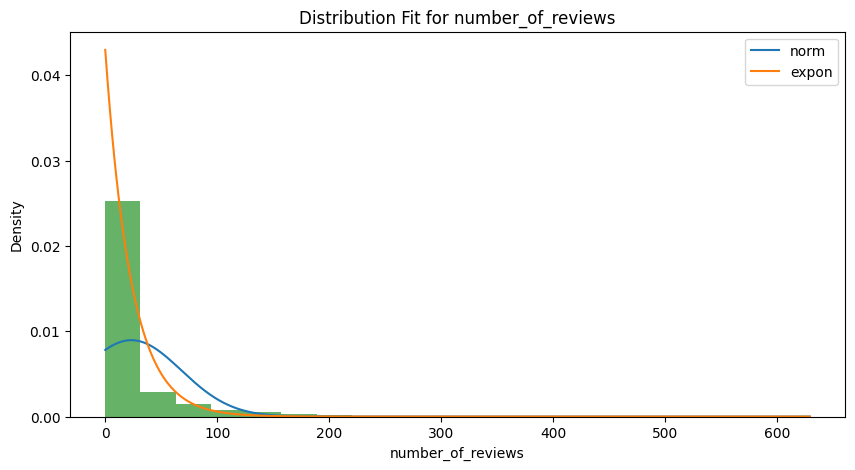

KS Statistic (norm): 0.3006843691431799, P-value: 0.0
KS Statistic (expon): 0.3181152805952766, P-value: 0.0
AD Statistic (norm): 7077.730482512881, Critical Values: [0.576 0.656 0.787 0.918 1.092], Significance Level: [15.  10.   5.   2.5  1. ]
AD Statistic (expon): inf, Critical Values: [0.922 1.078 1.341 1.606 1.957], Significance Level: [15.  10.   5.   2.5  1. ]


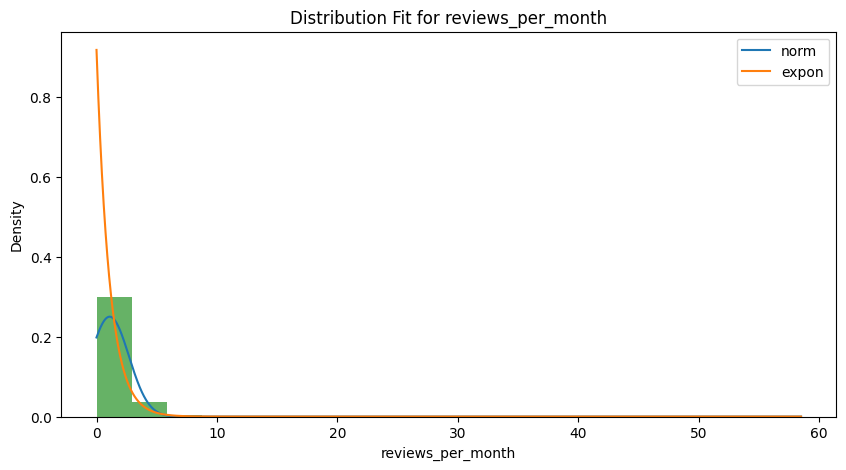

KS Statistic (norm): 0.2473079836715243, P-value: 0.0
KS Statistic (expon): 0.2503494481691382, P-value: 0.0
AD Statistic (norm): 4416.952657650385, Critical Values: [0.576 0.656 0.787 0.918 1.092], Significance Level: [15.  10.   5.   2.5  1. ]
AD Statistic (expon): inf, Critical Values: [0.922 1.078 1.341 1.606 1.957], Significance Level: [15.  10.   5.   2.5  1. ]


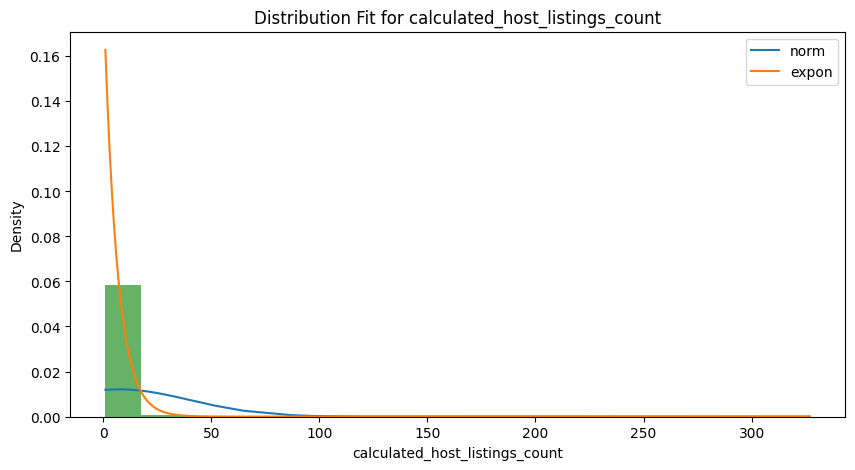

KS Statistic (norm): 0.4278505125791442, P-value: 0.0
KS Statistic (expon): 0.6606605992432764, P-value: 0.0
AD Statistic (norm): 15451.861681451846, Critical Values: [0.576 0.656 0.787 0.918 1.092], Significance Level: [15.  10.   5.   2.5  1. ]
AD Statistic (expon): 27341.232078934845, Critical Values: [0.922 1.078 1.341 1.606 1.957], Significance Level: [15.  10.   5.   2.5  1. ]


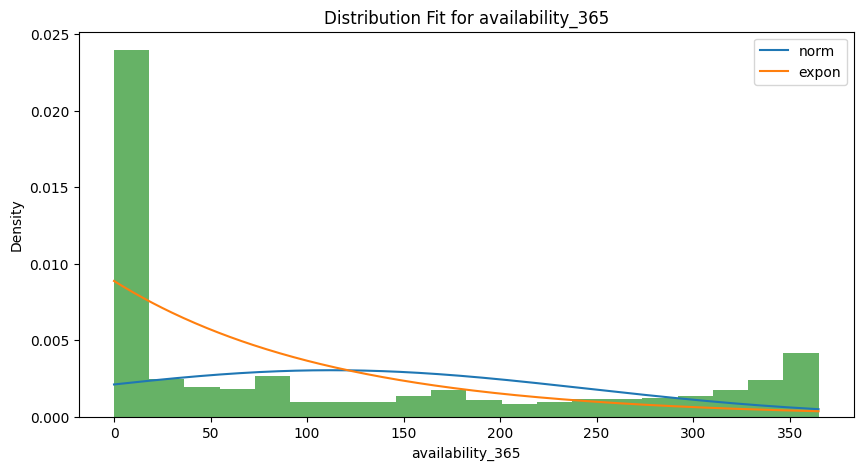

KS Statistic (norm): 0.20367652233859546, P-value: 0.0
KS Statistic (expon): 0.35858472236424993, P-value: 0.0
AD Statistic (norm): 4044.550982342851, Critical Values: [0.576 0.656 0.787 0.918 1.092], Significance Level: [15.  10.   5.   2.5  1. ]
AD Statistic (expon): inf, Critical Values: [0.922 1.078 1.341 1.606 1.957], Significance Level: [15.  10.   5.   2.5  1. ]


In [142]:
# Fitting different distributions to the existing data and visualize that exercise:

from scipy.stats import norm, expon, kstest, anderson

distributions = [norm, expon]

for column in numerical_df.columns:
    plt.figure(figsize=(10, 5))
    plt.hist(numerical_df[column], bins=20, density=True, alpha=0.6, color='g')

    for dist in distributions:
        params = dist.fit(numerical_df[column])
        pdf = dist.pdf(sorted(numerical_df[column]), *params)
        plt.plot(sorted(numerical_df[column]), pdf, label=dist.name)
    
    plt.title(f'Distribution Fit for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Evaluating the distributions' goodness of fit to the data via the Kolmogorov-Smirnov test:

    for dist in distributions:
        ks_stat, ks_pvalue = kstest(numerical_df[column], dist.name, args=dist.fit(numerical_df[column]))
        print(f"KS Statistic ({dist.name}): {ks_stat}, P-value: {ks_pvalue}")
    
    # Evaluating the distributions' goodness of fit to the data via the Anderson-Darling test:

    for dist in distributions:
        ad_stat, ad_critical_values, ad_significance_level = anderson(numerical_df[column], dist.name)
        print(f"AD Statistic ({dist.name}): {ad_stat}, Critical Values: {ad_critical_values}, Significance Level: {ad_significance_level}") 

## Conclusions from the attempt of fitting known distributions to our data:

We have not found, for any of our dataset's numerical columns, a well-enough fit to the known probability distributions and, for that reason, we will not change the data to ease the job of predictive modeling, instead we'll carry out our predictions using a Machine Learning algorithm that is capable of such without the need for the data to follow certain specific formats.

## Dimensionality Reduction:

Dimensionality reduction is certainly a useful tool to prepare a dataset for purposes of Machine Learning as it can eliminate unecessary inputs that would only bring about noise and unnacuracy to our model. However, in this particular case, and on the back of my extensive professional experience in the hospitaly sector, I believe all numerical columns that comprise numerical_df are crucial to determine accommodation prices. For that reason, I will not apply any Dimensionality Reduction.

## The Price-predictive Machine Learning model & accuracy testing:

## 1st iteration:

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = numerical_df.drop('price', axis=1)
y = numerical_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluating the machine learning model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 63.61550158502914
Mean Squared Error: 38356.92504070116
Root Mean Squared Error: 195.84924059260774
R-squared: 0.1329463638317433


## 2nd iteration (excludes the inputs' outliers from our prediction):

In [146]:
import numpy as np

# Creating a copy of the numerical_df so that I won't change the original:

numerical_df_no_outliers = numerical_df.copy()

def remove_outliers(column):
    Q1 = np.percentile(numerical_df_no_outliers[column], 25)
    Q3 = np.percentile(numerical_df_no_outliers[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (numerical_df_no_outliers[column] < lower_bound) | (numerical_df_no_outliers[column] > upper_bound)
    numerical_df_no_outliers.loc[outliers, column] = np.nan

for column in numerical_df:
    remove_outliers(column)

numerical_df_no_outliers = numerical_df_no_outliers.dropna()

In [147]:
X = numerical_df_no_outliers.drop('price', axis=1)
y = numerical_df_no_outliers['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [148]:
# Evaluating the machine learning model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 34.7286136849608
Mean Squared Error: 2241.9351606567275
Root Mean Squared Error: 47.3490777170657
R-squared: 0.5193787047841425
